In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
df = pd.read_csv(
    'results/cicero_test/imputed_data_9999.txt', sep='\t', index_col=0
)

In [5]:
imputed_data = df.T

In [6]:
cells = pd.read_csv('count_matrix_data/GSE96769_cell_names_matrix.csv', index_col=1)

In [9]:
cells[cells.cell_types == 'HSC']

,cell,cell_types
cell_id,,
cell_1,singles-BM0828-HSC-fresh-151027-1,HSC
cell_2,singles-BM0828-HSC-fresh-151027-2,HSC
cell_3,singles-BM0828-HSC-fresh-151027-3,HSC
cell_4,singles-BM0828-HSC-fresh-151027-4,HSC
cell_5,singles-BM0828-HSC-fresh-151027-5,HSC
...,...,...
cell_1798,singles-BM0106-HSC-SIM-160219-92,HSC
cell_1799,singles-BM0106-HSC-SIM-160219-93,HSC
cell_1800,singles-BM0106-HSC-SIM-160219-94,HSC


In [8]:
hsc_cells = cells[(cells.cell_types == 'HSC') & cells.index.isin(imputed_data.index)]

In [9]:
hsc_peaks = imputed_data[imputed_data.index.isin(hsc_cells.index)]

(array([  0.,   0.,   0.,   0.,   1.,  10.,  52., 232., 560., 805., 816.,
        776., 698., 602., 617., 537., 460., 428., 415., 377.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <a list of 20 Patch objects>)

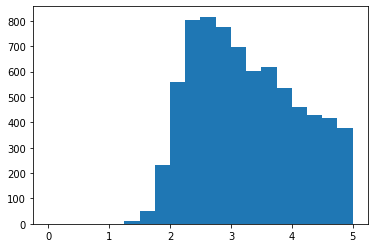

In [10]:
plt.hist(hsc_peaks.sum(axis=0), np.linspace(0.0, 5.0, 21))

In [11]:
hsc_peaks.sum(axis=0) > 1.0

Peak_68        True
Peak_69        True
Peak_1654      True
Peak_2228      True
Peak_2432      True
               ... 
Peak_458739    True
Peak_229689    True
Peak_425405    True
Peak_131298    True
Peak_110958    True
Length: 19392, dtype: bool

In [35]:
(hsc_peaks.T > hsc_peaks.mean(axis=1)).T & hsc_peaks > hsc_peaks.mean(axis=0)

,Peak_68,Peak_69,Peak_1654,Peak_2228,Peak_2432,Peak_3134,Peak_3299,Peak_3309,Peak_3753,Peak_4674,...,Peak_189911,Peak_79437,Peak_246986,Peak_178945,Peak_37508,Peak_458739,Peak_229689,Peak_425405,Peak_131298,Peak_110958
cell_1,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
cell_2,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
cell_3,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
cell_4,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
cell_5,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_1798,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
cell_1799,True,True,False,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
cell_1800,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
cell_1801,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [30]:
hsc_peaks.mean(axis=0)

Peak_68        0.031978
Peak_69        0.073584
Peak_1654      0.019675
Peak_2228      0.147423
Peak_2432      0.051054
                 ...   
Peak_458739    0.004306
Peak_229689    0.006726
Peak_425405    0.004557
Peak_131298    0.003945
Peak_110958    0.004605
Length: 19392, dtype: float64

In [34]:
(hsc_peaks.T > hsc_peaks.mean(axis=1)).T

,Peak_68,Peak_69,Peak_1654,Peak_2228,Peak_2432,Peak_3134,Peak_3299,Peak_3309,Peak_3753,Peak_4674,...,Peak_189911,Peak_79437,Peak_246986,Peak_178945,Peak_37508,Peak_458739,Peak_229689,Peak_425405,Peak_131298,Peak_110958
cell_1,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
cell_2,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
cell_3,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
cell_4,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
cell_5,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_1798,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
cell_1799,True,True,False,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
cell_1800,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
cell_1801,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [29]:
hsc_peaks

,Peak_68,Peak_69,Peak_1654,Peak_2228,Peak_2432,Peak_3134,Peak_3299,Peak_3309,Peak_3753,Peak_4674,...,Peak_189911,Peak_79437,Peak_246986,Peak_178945,Peak_37508,Peak_458739,Peak_229689,Peak_425405,Peak_131298,Peak_110958
cell_1,0.010263,0.029377,0.006541,0.079315,0.020838,0.030352,0.098039,0.049814,0.028028,0.023549,...,0.001141,0.001285,0.001408,0.000921,0.001272,0.000744,0.001944,0.001263,0.001145,0.001063
cell_2,0.021736,0.053670,0.012179,0.158609,0.038841,0.057113,0.196579,0.101000,0.056841,0.039277,...,0.001532,0.002656,0.002829,0.002131,0.001754,0.001721,0.003507,0.002088,0.001594,0.001751
cell_3,0.038120,0.090295,0.023571,0.145245,0.059181,0.068847,0.210415,0.111368,0.071944,0.068023,...,0.006778,0.006221,0.007147,0.005183,0.006986,0.004945,0.009380,0.006663,0.006562,0.005258
cell_4,0.017358,0.045967,0.010797,0.113651,0.028830,0.044942,0.133797,0.073154,0.043933,0.036312,...,0.001748,0.002262,0.002373,0.001647,0.001881,0.001286,0.003048,0.001991,0.001641,0.001493
cell_5,0.026581,0.067254,0.016991,0.163416,0.043228,0.064015,0.195245,0.109419,0.067041,0.051752,...,0.002755,0.003847,0.004221,0.002777,0.003182,0.002370,0.004881,0.003211,0.002667,0.002738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_1798,0.054671,0.130935,0.034410,0.273439,0.082748,0.116068,0.371890,0.231729,0.135413,0.090585,...,0.005245,0.007967,0.008354,0.006076,0.006555,0.005857,0.009796,0.006685,0.005225,0.005917
cell_1799,0.700259,1.005777,0.338235,1.410674,1.010169,0.768162,3.041361,1.823649,1.073182,0.512495,...,0.070276,0.130035,0.176580,0.182631,0.096668,0.236968,0.173834,0.113337,0.085279,0.179921
cell_1800,0.003585,0.011863,0.002630,0.032472,0.008746,0.011643,0.041439,0.021609,0.011358,0.009575,...,0.000495,0.000403,0.000411,0.000247,0.000533,0.000199,0.000655,0.000478,0.000480,0.000322
cell_1801,0.038072,0.088524,0.020356,0.200192,0.063041,0.082392,0.281757,0.146178,0.082496,0.062103,...,0.003624,0.005186,0.005886,0.004652,0.004141,0.004153,0.007242,0.004513,0.003712,0.004033


In [19]:
((hsc_peaks > hsc_peaks.mean(axis=1)) & (hsc_peaks > hsc_peaks.mean(axis=0)))

,Peak_100010,Peak_100012,Peak_100026,Peak_100030,Peak_100048,Peak_100050,Peak_100059,Peak_100076,Peak_100107,Peak_100137,...,cell_951,cell_952,cell_953,cell_954,cell_955,cell_956,cell_957,cell_958,cell_959,cell_96
cell_1,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell_2,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell_3,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell_4,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell_5,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_1798,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell_1799,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell_1800,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell_1801,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
hsc_peaks > hsc_peaks.mean(axis=0)

,Peak_68,Peak_69,Peak_1654,Peak_2228,Peak_2432,Peak_3134,Peak_3299,Peak_3309,Peak_3753,Peak_4674,...,Peak_189911,Peak_79437,Peak_246986,Peak_178945,Peak_37508,Peak_458739,Peak_229689,Peak_425405,Peak_131298,Peak_110958
cell_1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cell_2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cell_3,True,True,True,False,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
cell_4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cell_5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_1798,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
cell_1799,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
cell_1800,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cell_1801,True,True,True,True,True,True,True,True,True,True,...,False,True,True,True,False,False,True,False,False,False


In [28]:
hsc_peaks > hsc_peaks.mean(axis=1).T

,Peak_100010,Peak_100012,Peak_100026,Peak_100030,Peak_100048,Peak_100050,Peak_100059,Peak_100076,Peak_100107,Peak_100137,...,cell_951,cell_952,cell_953,cell_954,cell_955,cell_956,cell_957,cell_958,cell_959,cell_96
cell_1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cell_2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cell_3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cell_4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cell_5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_1798,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cell_1799,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cell_1800,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cell_1801,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
((imputed_data.T > imputed_data.mean(axis=1)).T & imputed_data > imputed_data.mean(axis=0))

,Peak_68,Peak_69,Peak_1654,Peak_2228,Peak_2432,Peak_3134,Peak_3299,Peak_3309,Peak_3753,Peak_4674,...,Peak_189911,Peak_79437,Peak_246986,Peak_178945,Peak_37508,Peak_458739,Peak_229689,Peak_425405,Peak_131298,Peak_110958
cell_1,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
cell_2,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
cell_3,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
cell_4,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
cell_5,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_2949,True,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
cell_2950,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
cell_2951,True,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
cell_2952,False,True,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [25]:
((hsc_peaks > hsc_peaks.mean(axis=1)) & (hsc_peaks > hsc_peaks.mean(axis=0)))

,Peak_100010,Peak_100012,Peak_100026,Peak_100030,Peak_100048,Peak_100050,Peak_100059,Peak_100076,Peak_100107,Peak_100137,...,cell_951,cell_952,cell_953,cell_954,cell_955,cell_956,cell_957,cell_958,cell_959,cell_96
cell_1,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell_2,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell_3,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell_4,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell_5,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_1798,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell_1799,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell_1800,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell_1801,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
filtered_hsc_cicero_peaks = hsc_peaks.T.loc[
    ((hsc_peaks.T > hsc_peaks.mean(axis=1)).T & hsc_peaks > hsc_peaks.mean(axis=0)).sum(axis=0) > 1.0]

In [37]:
filtered_hsc_cicero_peaks.index

Index(['Peak_68', 'Peak_69', 'Peak_2228', 'Peak_2432', 'Peak_3134',
       'Peak_3299', 'Peak_3309', 'Peak_3753', 'Peak_4674', 'Peak_5698',
       ...
       'Peak_165402', 'Peak_262859', 'Peak_227073', 'Peak_76141',
       'Peak_444062', 'Peak_7284', 'Peak_37727', 'Peak_483326', 'Peak_445483',
       'Peak_87133'],
      dtype='object', length=7331)

In [38]:
peak_file = pd.read_csv('count_matrix_data/GSE96769_PeakFile.csv').set_index('PeakFile_Peak_ID')

In [39]:
cicero_hsc_peaks = peak_file[peak_file.index.isin(filtered_hsc_cicero_peaks.index)]

In [40]:
# cicero_hsc_peaks['X1'] = cicero_hsc_peaks['X1'].astype(int)
cicero_hsc_peaks['X2'] = cicero_hsc_peaks['X2'].astype(int)
cicero_hsc_peaks['X3'] = cicero_hsc_peaks['X3'].astype(int)

/home/akhtyamovpavel/PythonEnvironments/BioInfoPython37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/akhtyamovpavel/PythonEnvironments/BioInfoPython37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
raw_hsc_peaks = peak_file[peak_file.index.isin(hsc_raw_peaks.T.loc[hsc_raw_peaks.sum(axis=0) > 0].index)]

In [85]:
raw_hsc_peaks['X2'] = raw_hsc_peaks['X2'].astype(int)
raw_hsc_peaks['X3'] = raw_hsc_peaks['X3'].astype(int)

/home/akhtyamovpavel/PythonEnvironments/BioInfoPython37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/akhtyamovpavel/PythonEnvironments/BioInfoPython37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
raw_hsc_peaks[['X1', 'X2', 'X3']].to_csv('raw_clp_peaks.bed', sep='\t', header=None, index=None)

In [41]:
cicero_hsc_peaks[['X1', 'X2', 'X3']].to_csv('cicero_hsc_peaks.bed', sep='\t', header=None, index=None)

In [55]:
np.sum(hsc_raw_peaks.sum(axis=0) <  0.5)

1575

In [24]:
hsc_raw_peaks = peak_file[]

NameError: name 'hsc_raw_peaks' is not defined

(array([1575.,    0.,    0.,    0., 1711.,    0.,    0.,    0., 1621.,
           0.,    0.,    0., 1489.,    0.,    0.,    0., 1227.,    0.,
           0., 1017.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <a list of 20 Patch objects>)

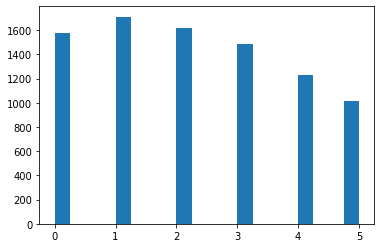

In [52]:
plt.hist(hsc_raw_peaks.sum(axis=0), np.linspace(0.0, 5.0, 21))

In [40]:
hsc_peaks.head()

,Peak_68,Peak_69,Peak_1654,Peak_2228,Peak_2432,Peak_3134,Peak_3299,Peak_3309,Peak_3753,Peak_4674,...,Peak_189911,Peak_79437,Peak_246986,Peak_178945,Peak_37508,Peak_458739,Peak_229689,Peak_425405,Peak_131298,Peak_110958
cell_1,0.012821,0.044806,0.016655,0.110760,0.013156,0.049124,0.095668,0.059913,0.044161,0.052000,...,0.000054,0.000252,0.000096,0.000107,0.000632,0.000288,0.000589,0.000221,0.000110,0.000111
cell_2,0.021724,0.076383,0.033631,0.359913,0.039155,0.105989,0.282443,0.191723,0.095200,0.131261,...,0.000093,0.000809,0.000140,0.000313,0.001010,0.001481,0.001244,0.000239,0.000054,0.000282
cell_3,0.022841,0.062842,0.023893,0.218606,0.026150,0.078198,0.178389,0.125539,0.070543,0.077446,...,0.000197,0.001166,0.000184,0.000210,0.001364,0.001154,0.001364,0.000258,0.000118,0.000223
cell_4,0.027964,0.087412,0.033410,0.369949,0.034233,0.111184,0.260837,0.185294,0.087715,0.119355,...,0.000129,0.000790,0.000141,0.000315,0.001629,0.001429,0.001605,0.000285,0.000076,0.000214
cell_5,0.011484,0.043434,0.015492,0.212689,0.015853,0.065983,0.138040,0.081387,0.049121,0.072091,...,0.000030,0.000167,0.000054,0.000165,0.000646,0.000451,0.000564,0.000095,0.000023,0.000086


In [81]:
hsc_cells

,cell,cell_types
cell_id,,
cell_384,singles-BM0828-CLP-frozen-151103-1,CLP
cell_385,singles-BM0828-CLP-frozen-151103-2,CLP
cell_386,singles-BM0828-CLP-frozen-151103-3,CLP
cell_387,singles-BM0828-CLP-frozen-151103-4,CLP
cell_388,singles-BM0828-CLP-frozen-151103-5,CLP
...,...,...
cell_859,BM1077-CLP-Frozen-160106-92,CLP
cell_860,BM1077-CLP-Frozen-160106-93,CLP
cell_861,BM1077-CLP-Frozen-160106-94,CLP


In [44]:
df_clear = pd.read_csv('count_matrix_data/GSE96769_scATACseq_matrix.csv', index_col=0)

In [54]:
df_clear_peaks = df_clear

In [82]:
hsc_raw_peaks = df_clear_peaks.T

In [83]:
hsc_raw_peaks = hsc_raw_peaks[hsc_raw_peaks.index.isin(hsc_cells.index)]

In [58]:
hsc_raw_peaks

,Peak_52,Peak_53,Peak_68,Peak_69,Peak_151,Peak_332,Peak_351,Peak_459,Peak_461,Peak_556,...,Peak_355879,Peak_373713,Peak_390422,Peak_407340,Peak_407673,Peak_431281,Peak_472663,Peak_239251,Peak_350151,Peak_383161
cell_1,1,1,1,1,1,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
cell_2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
cell_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cell_4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
cell_5,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_1798,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cell_1799,0,0,0,1,9,1,2,1,2,8,...,0,0,0,0,0,0,0,0,0,0
cell_1800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cell_1801,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(array([4.77741e+05, 8.36000e+03, 2.46100e+03, 7.07000e+02, 2.48000e+02,
        9.50000e+01, 3.60000e+01, 1.50000e+01, 5.00000e+00, 3.00000e+00]),
 array([  0. ,  60.4, 120.8, 181.2, 241.6, 302. , 362.4, 422.8, 483.2,
        543.6, 604. ]),
 <a list of 10 Patch objects>)

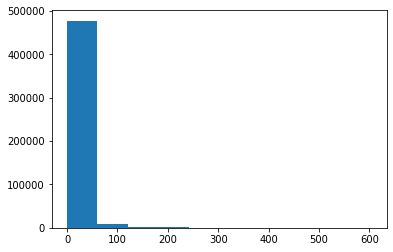

In [57]:
plt.hist(hsc_raw_peaks.sum(axis=0))

In [50]:
hsc_raw_peaks.T.loc[hsc_raw_peaks.sum(axis=0) > 0].index

Index(['Peak_68', 'Peak_69', 'Peak_1654', 'Peak_2228', 'Peak_2432',
       'Peak_3134', 'Peak_3299', 'Peak_3309', 'Peak_3753', 'Peak_4674',
       ...
       'Peak_383984', 'Peak_170988', 'Peak_9221', 'Peak_337898', 'Peak_79437',
       'Peak_246986', 'Peak_178945', 'Peak_458739', 'Peak_229689',
       'Peak_425405'],
      dtype='object', length=17817)

In [12]:
import pandas as pd

In [62]:
sra = pd.read_csv('/home/akhtyamovpavel/Downloads/SraRunTable (1).txt', index_col=0)

In [63]:
sra[sra.Cell_type == 'CLP']

,Assay Type,AvgSpotLen,BioProject,BioSample,Cell_type,Center Name,Consent,DATASTORE filetype,DATASTORE provider,DATASTORE region,...,MBases,MBytes,Organism,Platform,ReleaseDate,sample_acc,Sample Name,source_name,SRA Study,tissue
Run,,,,,,,,,,,,,,,,,,,,,
SRR5355388,ATAC-seq,152,PRJNA379613,SAMN06615476,CLP,GEO,public,sra,"gs,ncbi,s3","gs.US,ncbi.public,s3.us-east-1",...,21,5,Homo sapiens,ILLUMINA,2018-04-29T00:00:00Z,SRS2056809,GSM2542321,Bone Marrow CD34+,SRP102089,CD34+ Bone Marrow
SRR5355389,ATAC-seq,152,PRJNA379613,SAMN06615475,CLP,GEO,public,sra,"gs,ncbi,s3","gs.US,ncbi.public,s3.us-east-1",...,18,4,Homo sapiens,ILLUMINA,2018-04-29T00:00:00Z,SRS2056804,GSM2542322,Bone Marrow CD34+,SRP102089,CD34+ Bone Marrow
SRR5355390,ATAC-seq,152,PRJNA379613,SAMN06615569,CLP,GEO,public,sra,"gs,ncbi,s3","gs.US,ncbi.public,s3.us-east-1",...,21,5,Homo sapiens,ILLUMINA,2018-04-29T00:00:00Z,SRS2056802,GSM2542323,Bone Marrow CD34+,SRP102089,CD34+ Bone Marrow
SRR5355391,ATAC-seq,152,PRJNA379613,SAMN06615568,CLP,GEO,public,sra,"gs,ncbi,s3","gs.US,ncbi.public,s3.us-east-1",...,17,4,Homo sapiens,ILLUMINA,2018-04-29T00:00:00Z,SRS2056805,GSM2542324,Bone Marrow CD34+,SRP102089,CD34+ Bone Marrow
SRR5355392,ATAC-seq,152,PRJNA379613,SAMN06615567,CLP,GEO,public,sra,"gs,ncbi,s3","gs.US,ncbi.public,s3.us-east-1",...,12,3,Homo sapiens,ILLUMINA,2018-04-29T00:00:00Z,SRS2056814,GSM2542325,Bone Marrow CD34+,SRP102089,CD34+ Bone Marrow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR5355563,ATAC-seq,152,PRJNA379613,SAMN06615224,CLP,GEO,public,"sra,unknown_contigs","gs,ncbi,s3","gs.US,ncbi.public,s3.us-east-1",...,27,9,Homo sapiens,ILLUMINA,2018-04-29T00:00:00Z,SRS2056980,GSM2542496,Bone Marrow CD34+,SRP102089,CD34+ Bone Marrow
SRR5355487,ATAC-seq,152,PRJNA379613,SAMN06614987,CLP,GEO,public,"sra,unknown_contigs","gs,ncbi,s3","gs.US,ncbi.public,s3.us-east-1",...,36,12,Homo sapiens,ILLUMINA,2018-04-29T00:00:00Z,SRS2056904,GSM2542420,Bone Marrow CD34+,SRP102089,CD34+ Bone Marrow
SRR5355450,ATAC-seq,152,PRJNA379613,SAMN06615230,CLP,GEO,public,sra,"gs,ncbi,s3","gs.US,ncbi.public,s3.us-east-1",...,0,0,Homo sapiens,ILLUMINA,2018-04-29T00:00:00Z,SRS2056867,GSM2542383,Bone Marrow CD34+,SRP102089,CD34+ Bone Marrow


In [64]:
sra_hsc = sra[sra.Cell_type == 'CLP']

In [65]:
sra_hsc.index

Index(['SRR5355388', 'SRR5355389', 'SRR5355390', 'SRR5355391', 'SRR5355392',
       'SRR5355393', 'SRR5355394', 'SRR5355395', 'SRR5355396', 'SRR5355397',
       ...
       'SRR5355576', 'SRR5355577', 'SRR5355578', 'SRR5355579', 'SRR5355505',
       'SRR5355563', 'SRR5355487', 'SRR5355450', 'SRR5355535', 'SRR5355446'],
      dtype='object', name='Run', length=192)

In [68]:
def write_samtools_script(df, output_file):
    runs = []
    for run in list(df.index):
        runs.append(f'{run}_cleaned.shifted.bam')
        
    run_command = f'samtools cat {" ".join(runs)} > {output_file}'
    return run_command

In [69]:
write_samtools_script(sra_hsc, 'clp_merged.bam')

'samtools cat SRR5355388_cleaned.shifted.bam SRR5355389_cleaned.shifted.bam SRR5355390_cleaned.shifted.bam SRR5355391_cleaned.shifted.bam SRR5355392_cleaned.shifted.bam SRR5355393_cleaned.shifted.bam SRR5355394_cleaned.shifted.bam SRR5355395_cleaned.shifted.bam SRR5355396_cleaned.shifted.bam SRR5355397_cleaned.shifted.bam SRR5355398_cleaned.shifted.bam SRR5355399_cleaned.shifted.bam SRR5355400_cleaned.shifted.bam SRR5355401_cleaned.shifted.bam SRR5355402_cleaned.shifted.bam SRR5355403_cleaned.shifted.bam SRR5355404_cleaned.shifted.bam SRR5355405_cleaned.shifted.bam SRR5355406_cleaned.shifted.bam SRR5355407_cleaned.shifted.bam SRR5355408_cleaned.shifted.bam SRR5355409_cleaned.shifted.bam SRR5355410_cleaned.shifted.bam SRR5355411_cleaned.shifted.bam SRR5355412_cleaned.shifted.bam SRR5355413_cleaned.shifted.bam SRR5355414_cleaned.shifted.bam SRR5355415_cleaned.shifted.bam SRR5355416_cleaned.shifted.bam SRR5355417_cleaned.shifted.bam SRR5355418_cleaned.shifted.bam SRR5355419_cleaned.shifte

In [13]:
sra_hsc.to_csv('count_matrix_data/sra_hsc.csv')